# trait for PCA


In [14]:
import os
import sys
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm  import tqdm
%matplotlib inline

In [15]:
# 读取文件 
df = pd.read_csv('../pca.csv')

In [16]:

df.head()

,Pop,OIL,C160,C161,C180,C181,C182,C183,C200,C220,C240,C160/C161,C160/C180,C180/C181,C181/C182,C182/C183,C180/C200,C200/C220,C220/C240,SFA/USFA
0,BYD,7.122033,14.272114,0.123069,1.558394,33.228738,49.036523,0.965721,0.181148,0.137355,0.182214,115.968466,9.158217,0.046899,0.677632,50.777110,8.602900,1.318826,0.753813,0.195926
1,BYD,8.525464,14.338884,0.113115,2.016783,38.925856,43.829209,0.699318,0.239490,0.126037,0.124046,126.763439,7.109781,0.051811,0.888126,62.674257,8.421166,1.900150,1.016053,0.201576
2,BYD,7.512540,13.789575,0.116325,1.858545,36.881742,46.156101,0.857483,0.225898,0.127105,0.142440,118.543780,7.419553,0.050392,0.799065,53.827407,8.227379,1.777252,0.892337,0.192159
3,BYD,5.675111,13.269462,0.161762,1.794555,32.105663,50.936083,1.196483,0.224954,0.154170,0.220697,82.030675,7.394292,0.055895,0.630313,42.571500,7.977433,1.459128,0.698560,0.185591
4,BYD,6.599425,15.629341,0.128949,1.624541,31.356648,49.368046,0.972704,0.236377,0.163038,0.217288,121.205420,9.620773,0.051809,0.635161,50.753405,6.872661,1.449826,0.750333,0.218396


In [17]:
# 创建用平均值补全函数
f = lambda x :x.fillna(x.mean())

In [18]:
# 根据group分组并补全缺失值
df_fillna = df.groupby('Pop').apply(f)

In [20]:
df_fillna.head()

Pop       OIL       C160      C161      C180       C181       C182  \
Pop                                                                         
BYD 0  BYD  7.122033  14.272114  0.123069  1.558394  33.228738  49.036523   
    1  BYD  8.525464  14.338884  0.113115  2.016783  38.925856  43.829209   
    2  BYD  7.512540  13.789575  0.116325  1.858545  36.881742  46.156101   
    3  BYD  5.675111  13.269462  0.161762  1.794555  32.105663  50.936083   
    4  BYD  6.599425  15.629341  0.128949  1.624541  31.356648  49.368046   

           C183      C200      C220      C240   C160/C161  C160/C180  \
Pop                                                                    
BYD 0  0.965721  0.181148  0.137355  0.182214  115.968466   9.158217   
    1  0.699318  0.239490  0.126037  0.124046  126.763439   7.109781   
    2  0.857483  0.225898  0.127105  0.142440  118.543780   7.419553   
    3  1.196483  0.224954  0.154170  0.220697   82.030675   7.394292   
    4  0.972704  0.236377  0.163038  0.217288  121.205420   9.620773   

       C180/C181  C181/C182  C182/C183  C180/C200  C200/C220  C220/C240  \
Pop                                                                       
BYD 0   0.046899   0.677632  50.777110   8.602900   1.318826   0.753813   
    1   0.051811   0.888126  62.674257   8.421166   1.900150   1.016053   
    2   0.050392   0.799065  53.827407   8.227379   1.777252   0.892337   
    3   0.055895   0.630313  42.571500   7.977433   1.459128   0.698560   
    4   0.051809   0.635161  50.753405   6.872661   1.449826   0.750333   

       SFA/USFA  
Pop              
BYD 0  0.195926  
    1  0.201576  
    2  0.192159  
    3  0.185591  
    4  0.218396

In [22]:
# 统计缺失值
np.sum(np.sum(df_fillna.isnull()))

0

In [24]:
# 设置Pop为index，并转置矩阵
df_fillna.set_index('Pop',inplace=True)
df_fillna_tran = df_fillna.T
df_fillna_tran.head()

Pop,BYD,BYD,BYD,BYD,BYD,BYD,BYD,BYD,BYD,BYD,...,KUB,KUB,KUB,KUB,KUB,KUB,KUB,KUB,KUB,KUB
OIL,7.122033,8.525464,7.512540,5.675111,6.599425,5.744143,8.979087,8.779603,5.988904,7.271139,...,3.836310,4.576893,5.314281,4.794836,4.447907,4.194083,4.340297,5.155528,3.811738,4.923631
C160,14.272114,14.338884,13.789575,13.269462,15.629341,13.377778,10.325888,10.478535,12.467412,12.327479,...,15.436653,15.496510,13.781478,15.328100,15.749318,15.932111,16.049725,15.166696,16.450917,14.936676
C161,0.123069,0.113115,0.116325,0.161762,0.128949,0.156635,0.139860,0.139279,0.148155,0.130493,...,0.119784,0.089589,0.095645,0.114885,0.123368,0.109844,0.127173,0.122530,0.130651,0.115738
C180,1.558394,2.016783,1.858545,1.794555,1.624541,1.938987,1.998090,2.054640,1.798651,2.465269,...,2.438506,3.370230,2.667494,2.401868,3.329491,2.443799,2.264199,2.349123,2.167783,3.148734
C181,33.228738,38.925856,36.881742,32.105663,31.356648,38.568157,40.090647,37.986795,32.221836,38.384565,...,33.758975,31.851271,33.884597,34.597317,34.761333,31.515433,36.413834,32.765424,30.143222,31.417359


In [153]:
#统计转置矩阵纬度
df_fillna_tran.shape
df_fillna_tran.to_csv('trait_tran.csv')

In [28]:
# 导入标准化函数，PCA函数
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



In [29]:
# 创建测试pca对象 获取pca index 解释率 ； 创建标准化对象
sc = StandardScaler()
pca_test = PCA()


In [32]:
# 标准化矩阵
df_fillna_tran_std = sc.fit_transform(df_fillna_tran)

In [37]:
# 查看标准化结果
df_tem = pd.DataFrame(df_fillna_tran_std,index=df_fillna_tran.index,columns=df_fillna_tran.columns)


In [38]:
df_tem.describe()

Pop,BYD,BYD,BYD,BYD,BYD,BYD,BYD,BYD,BYD,BYD,...,KUB,KUB,KUB,KUB,KUB,KUB,KUB,KUB,KUB,KUB
count,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,...,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01
mean,-9.349247e-17,5.843279e-17,-5.843279e-18,1.636118e-16,0.000000,4.674623e-17,5.258951e-17,-5.843279e-18,9.933574e-17,-7.596263e-17,...,-5.843279e-18,3.798131e-17,2.921640e-18,7.304099e-17,-3.505967e-17,2.424961e-16,-3.213803e-17,-5.843279e-17,2.921640e-17,-4.090295e-17
std,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,...,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00
min,-5.425125e-01,-5.343320e-01,-5.395752e-01,-5.909766e-01,-0.530978,-5.880910e-01,-6.038528e-01,-6.030369e-01,-5.860506e-01,-5.743824e-01,...,-4.982450e-01,-4.519213e-01,-4.797641e-01,-5.018611e-01,-5.038883e-01,-4.811108e-01,-5.046373e-01,-5.077450e-01,-5.045854e-01,-5.103400e-01
25%,-5.375180e-01,-5.289282e-01,-5.341257e-01,-5.834088e-01,-0.525011,-5.795231e-01,-5.965817e-01,-5.956403e-01,-5.782398e-01,-5.667974e-01,...,-4.852392e-01,-4.431242e-01,-4.706746e-01,-4.919093e-01,-4.926821e-01,-4.708171e-01,-4.922963e-01,-4.964544e-01,-4.918453e-01,-5.014098e-01
50%,-4.978296e-01,-4.751331e-01,-4.802545e-01,-5.273612e-01,-0.483469,-5.194691e-01,-5.189792e-01,-5.151937e-01,-5.215532e-01,-4.903472e-01,...,-4.201708e-01,-3.784311e-01,-4.023839e-01,-4.279762e-01,-3.960949e-01,-4.111768e-01,-4.305417e-01,-4.299656e-01,-4.344345e-01,-4.118541e-01
75%,-1.326050e-01,-1.698393e-01,-1.631456e-01,-1.118980e-01,-0.103699,-1.423953e-01,-1.855229e-01,-1.826044e-01,-1.591235e-01,-1.836368e-01,...,-1.415314e-01,-1.901317e-01,-1.967243e-01,-1.602084e-01,-1.539414e-01,-1.516285e-01,-1.174415e-01,-1.409556e-01,-1.046751e-01,-1.744678e-01
max,3.529825e+00,3.524015e+00,3.530882e+00,3.125339e+00,3.586208,3.182948e+00,2.610325e+00,2.698092e+00,2.997754e+00,3.171888e+00,...,3.751393e+00,3.915981e+00,3.824841e+00,3.722332e+00,3.748403e+00,3.803298e+00,3.739904e+00,3.717146e+00,3.707518e+00,3.655729e+00


In [39]:
# 测试pca
pca_test_result = pca_test.fit_transform(df_fillna_tran_std)

In [133]:
# 获取pca index 解释率
var_exp = pca_test.explained_variance_ratio_
var_exp
pca_test.n_features_


1138

In [41]:
# 获取累加解释率
cum_exp  = np.cumsum(var_exp)
cum_exp

array([0.97149681, 0.9909849 , 0.99771352, 0.99938803, 0.99965285,
       0.99985719, 0.99994974, 0.99998534, 0.99999633, 0.99999896,
       0.99999954, 0.9999999 , 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        ])

In [45]:
# 正式PCA
pca = PCA(n_components=3 )

In [46]:
# 训练数据集
train = pca.fit_transform(df_fillna_tran_std)

In [47]:
train

array([[-1.10116709e+01,  5.25324452e-01, -1.26165732e+00],
       [-5.42195813e-01, -9.60429397e-01,  2.15180186e+00],
       [-1.77332997e+01, -1.55242981e+00, -1.54917652e-01],
       [-1.51158408e+01, -1.20590998e+00, -2.26585201e-01],
       [ 1.97968387e+01,  7.72930533e+00, -4.32256756e+00],
       [ 4.37679465e+01,  7.14774874e+00,  9.85505650e+00],
       [-1.64524817e+01, -1.56495254e+00,  2.91594263e-01],
       [-1.73712538e+01, -1.58127595e+00, -1.55040246e-01],
       [-1.77044317e+01, -1.57628914e+00, -1.58659775e-01],
       [-1.76050715e+01, -1.58788175e+00, -9.81656108e-02],
       [ 1.17501168e+02, -1.05101391e+01, -1.87508010e+00],
       [-9.74835599e+00, -1.27312570e+00,  1.51130948e+00],
       [-1.78022868e+01, -1.58860352e+00, -1.71108623e-01],
       [-1.71295169e+01, -1.39585042e+00, -3.33555418e-01],
       [ 3.73245769e+01,  1.31331759e+01, -4.13254195e+00],
       [-1.09827939e+01,  5.51948912e-01, -2.82427988e-01],
       [-1.44985619e+01, -1.29415081e+00

In [135]:
# 创建作图函数 1 

def plot_pca_index(n_feather, var_exp, cum_var_exp):

    plt.figure(figsize=(12,6))
    plt.style = 'Set1'
    plt.bar(range(1, n_feather+1), var_exp, alpha=0.5, align='center',
                label='individual explained variance',
                )

    plt.step(range(1, n_feather+1),
                 cum_var_exp,
                 where='mid',
                 label='cumulative explained variance')

    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.xticks(range(1,n_feather+1))
    plt.savefig('pca_index.pdf', format='pdf',
                    bbox_inches='tight', dpi=300)


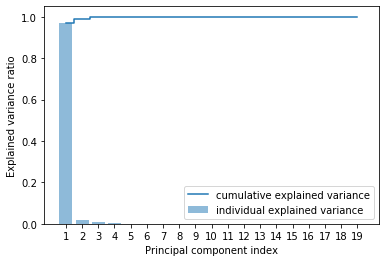

In [63]:
# 作图并保存pdf
plot_pca_index(len(var_exp),var_exp,cum_exp)

In [64]:
# 切换工作文件夹
cd ../trait/

/Users/liyang/Desktop/2019-work_report/FH/trait


In [69]:
# 创建作图函数 2 
def plot_pcas_line(cum_var_exp, n_feather):


    plt.figure()
    plt.style = 'Set1'
    plt.plot(range(1, n_feather+1), cum_var_exp, 'k--')
    plt.xlabel('Principal component index')
    plt.ylabel('Explained variance ratio')
    plt.xticks(range(1,n_feather+1))
    plt.savefig('pca_line.pdf',
            format='pdf',
            bbox_inches='tight',
            dpi=300)


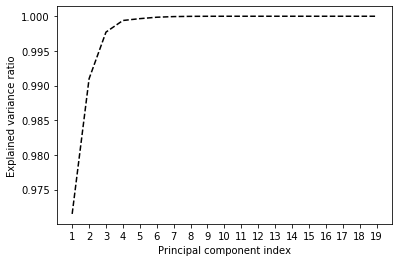

In [70]:
# 作图并保存
plot_pcas_line(cum_exp,len(cum_exp))

In [147]:
# 创建绘制3D图分布
def plot_distribution3d(data_pca, var_exp, legend_loc='best'):
    group = pd.unique(data_pca.index)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
        # plt.style = 'Set1'

        # markers = ['s','x','o','1','+','*','^','v']

    for g in group:
        plt.scatter(data_pca.loc[g, 'Pc1'],
                data_pca.loc[g, 'Pc2'],
                data_pca.loc[g, 'Pc3'],
                #c = cm.jet(i),
               # marker = m,
                label=g)
             #   edgecolors='black')
    ax.set_xlabel(f'PC 1 ({var_exp[0]:.2f})')

    ax.set_ylabel(f'PC 2 ({var_exp[1]:.2f})')

    ax.set_zlabel(f'PC 3 ({var_exp[2]:.2f})')

    ax.legend(legend_loc)

    plt.savefig('3d_distribution.pdf', format='pdf',
            bbox_inches='tight',
            dpi=300)

In [ ]:
# 创建颜色 1 
from matplotlib import cm 
col = cm.jet(float(index)/cluster_num)

In [73]:
# 创建颜色 2 
colors = ['#F0F8FF', '#FAEBD7', '#00FFFF',
            '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000',
            '#FFEBCD', '#0000FF',  '#8A2BE2', '#A52A2A', '#DEB887',
            '#5F9EA0', '#7FFF00',
      '#D2691E',
      '#FF7F50',
     '#6495ED',
    '#FFF8DC',
    '#DC143C',
    '#00FFFF',
    '#00008B',
   '#008B8B',
   '#B8860B',
  '#A9A9A9', ]
len(colors)

25

In [75]:
# 格式化作图数据集
train_for_plot = pd.DataFrame(train,index = df_fillna_tran.index,columns=['Pc1','Pc2','Pc3'])
train_for_plot.head()

,Pc1,Pc2,Pc3
OIL,-11.011671,0.525324,-1.261657
C160,-0.542196,-0.960429,2.151802
C161,-17.733300,-1.552430,-0.154918
C180,-15.115841,-1.205910,-0.226585
C181,19.796839,7.729305,-4.322568


In [77]:
# 统计作图数据集
train_for_plot.describe()

,Pc1,Pc2,Pc3
count,1.900000e+01,1.900000e+01,1.900000e+01
mean,-3.552714e-15,-2.220446e-16,-9.524545e-16
std,3.416114e+01,4.838339e+00,2.842987e+00
min,-1.780229e+01,-1.051014e+01,-4.322568e+00
25%,-1.748816e+01,-1.578783e+00,-3.079917e-01
50%,-1.511584e+01,-1.395850e+00,-1.711086e-01
75%,-5.145276e+00,-2.175525e-01,-1.265416e-01
max,1.175012e+02,1.313318e+01,9.855056e+00


/Users/liyang/miniconda3/envs/work/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/liyang/miniconda3/envs/work/lib/python3.7/site-packages/matplotlib/collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


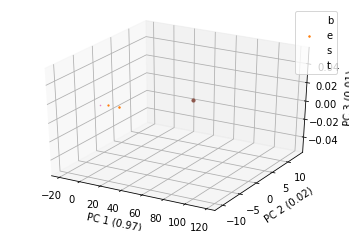

In [148]:
# 作3D分布图
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
plot_distribution3d(train_for_plot,var_exp)

In [80]:
#  确定两次结果是否相等
old_pca  = pd.read_csv('pca.csv')
old_pca.head()

,Unnamed: 0,Pc1,Pc2,Pc3
0,OIL,-11.011671,0.525324,-1.261657
1,C160,-0.542196,-0.960429,2.151802
2,C161,-17.733300,-1.552430,-0.154918
3,C180,-15.115841,-1.205910,-0.226585
4,C181,19.796839,7.729305,-4.322568


In [82]:
train_for_plot.head()

,Pc1,Pc2,Pc3
OIL,-11.011671,0.525324,-1.261657
C160,-0.542196,-0.960429,2.151802
C161,-17.733300,-1.552430,-0.154918
C180,-15.115841,-1.205910,-0.226585
C181,19.796839,7.729305,-4.322568


In [91]:
# 创建2D作图函数
def plot_distribution2d(fig,ma, colors,data_pca,var_exp,legend_loc='best'):
    
    group = pd.unique(data_pca.index)
    
    plt.figure(figsize=fig)
    
    plt.style = 'Set1'
        # colors = ['r','b','g','c','m','y','k','w']

        # markers = ['s','x','o','1','+','*','^','v']

    for g,c, m in zip(group,colors,ma):
        plt.scatter(data_pca.loc[g,'Pc1'],
                data_pca.loc[g,'Pc2'],
                c=c,
                marker = m,
                label=g,
                edgecolors='black')
    plt.xlabel(f'PC 1 ({var_exp[0]:.2f})')

    plt.ylabel(f'PC 2 ({var_exp[1]:.2f})')

    plt.legend(loc=legend_loc)

    plt.savefig('2dddistribution.pdf',format='pdf',
            bbox_inches='tight',
            dpi=300)



In [89]:
# 创建marker
markers=['.',
    ',',
    'o',
    'v',
    '^',
    '<',
    '>',
'1',
'2',
'3',
'4',
's',
'p',
'*',
'h',
'H',
'+',
'x',
'D',
'd',
'|',
'_',]

In [90]:
# 作2D图


'/Users/liyang/Desktop/2019-work_report/FH/trait'

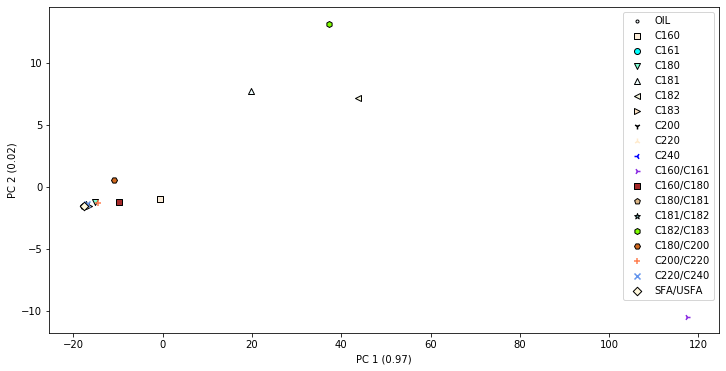

In [93]:
plot_distribution2d((12,6),markers[:19],colors[:19],train_for_plot,var_exp)

# pop for pca 

In [94]:
df_fillna.head()

,OIL,C160,C161,C180,C181,C182,C183,C200,C220,C240,C160/C161,C160/C180,C180/C181,C181/C182,C182/C183,C180/C200,C200/C220,C220/C240,SFA/USFA
Pop,,,,,,,,,,,,,,,,,,,
BYD,7.122033,14.272114,0.123069,1.558394,33.228738,49.036523,0.965721,0.181148,0.137355,0.182214,115.968466,9.158217,0.046899,0.677632,50.777110,8.602900,1.318826,0.753813,0.195926
BYD,8.525464,14.338884,0.113115,2.016783,38.925856,43.829209,0.699318,0.239490,0.126037,0.124046,126.763439,7.109781,0.051811,0.888126,62.674257,8.421166,1.900150,1.016053,0.201576
BYD,7.512540,13.789575,0.116325,1.858545,36.881742,46.156101,0.857483,0.225898,0.127105,0.142440,118.543780,7.419553,0.050392,0.799065,53.827407,8.227379,1.777252,0.892337,0.192159
BYD,5.675111,13.269462,0.161762,1.794555,32.105663,50.936083,1.196483,0.224954,0.154170,0.220697,82.030675,7.394292,0.055895,0.630313,42.571500,7.977433,1.459128,0.698560,0.185591
BYD,6.599425,15.629341,0.128949,1.624541,31.356648,49.368046,0.972704,0.236377,0.163038,0.217288,121.205420,9.620773,0.051809,0.635161,50.753405,6.872661,1.449826,0.750333,0.218396


In [97]:
cd ../pop


/Users/liyang/Desktop/2019-work_report/FH/pop


In [98]:
ls

未命名.ipynb


In [99]:
# 创建 pca
pca_pop = PCA(n_components=3)


In [100]:
# 标准化数据集
df_fillna_std = sc.fit_transform(df_fillna)

In [103]:
#  head 
df_fillna_std.shape

(1138, 19)

In [119]:
# 训练数据
pca_pop_train  = pca_pop.fit_transform(df_fillna_std)

In [120]:
pca_pop_train

array([[-1.66962026, -3.08250009, -0.73271397],
       [-4.32583348, -1.32966367, -0.94453848],
       [-3.16703394, -1.99672092, -0.71728162],
       ...,
       [-0.24374758,  1.56127243, -0.40418248],
       [ 1.77025231,  1.41029057, -0.74263117],
       [-0.73301187,  2.16341083,  0.11186905]])

In [107]:
!less -S  ./pc3.csv

Pop,Pc1,Pc2,Pc3
BYD,-1.6696202637853548,-3.0825000915397522,-0.7327139751278878
BYD,-4.325833480414279,-1.329663672556361,-0.9445384912068523
BYD,-3.167033942990088,-1.996720915376285,-0.7172816138470737
BYD,-0.5068166095680259,-3.2116980409729017,0.9071653170123828
BYD,-0.4719285784995253,-2.2802802881349185,-0.9909119338048379
BYD,-1.843362940793821,-2.0885690352695576,0.37752996161723645
BYD,-5.056914260664073,-2.1787005057274142,0.6761142855720623
BYD,-4.528325483024436,-2.0207006952867137,0.9311573362298887
BYD,-1.1705338032586416,-3.0905322960460886,0.9457465353486708
BYD,-3.507884274238542,-0.9168643857097954,0.7783446102047369
BYD,-1.519583267924361,-2.3896672920849222,2.1946952707204206
BYD,-1.9119803073682688,-2.3803071152572572,0.48748588199591425
BYD,-2.01640204201005,-2.310137692496139,1.368064336380186
BYD,-1.789049159197767,-3.008040231014021,1.9504201036540456
BYD,-2.6863333593868384,-2.2651207531695494,0.6158558964152511
BYD,-1.7218860035916166,-3.558850515037871,0.422

In [138]:
# 查看变量
%whos

Variable              Type              Data/Info
-------------------------------------------------
Axes3D                type              <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
PCA                   ABCMeta           <class 'sklearn.decomposition.pca.PCA'>
StandardScaler        type              <class 'sklearn.preproces<...>ing.data.StandardScaler'>
colors                list              n=25
cum_exp               ndarray           19: 19 elems, type `float64`, 152 bytes
cum_exp_pop           ndarray           19: 19 elems, type `float64`, 152 bytes
df                    DataFrame               Pop       OIL      <...>n[1138 rows x 20 columns]
df_fillna             DataFrame                   OIL       C160 <...>n[1138 rows x 19 columns]
df_fillna_std         ndarray           1138x19: 21622 elems, type `float64`, 172976 bytes (168.921875 kb)
df_fillna_tran        DataFrame         Pop               BYD    <...>n[19 rows x 1138 columns]
df_fillna_tran_std    ndarray          

In [128]:
# 获取作图用参数
pop_pca = PCA()
pop_pca_re = pop_pca.fit_transform(df_fillna_std)


In [134]:
var_exp_pop = pop_pca.explained_variance_ratio_
cum_exp_pop = np.cumsum(var_exp_pop)
pop_pca.n_features_

19

In [130]:

var_exp_pop

array([4.34532282e-01, 2.02168592e-01, 1.13243946e-01, 7.07855658e-02,
       6.92126976e-02, 4.21120324e-02, 2.95848163e-02, 1.33879265e-02,
       7.76276423e-03, 6.35037171e-03, 2.66804504e-03, 2.18508326e-03,
       1.85194356e-03, 1.65473209e-03, 9.94666766e-04, 7.20483943e-04,
       5.52842335e-04, 1.27926327e-04, 1.03281608e-04])

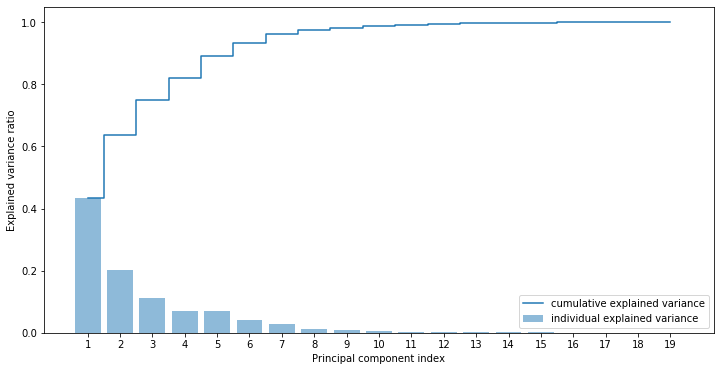

In [136]:
# 作图 
plot_pca_index(len(var_exp_pop),var_exp_pop,cum_exp_pop)

In [140]:
# 测试3D 图错误 



Variable              Type              Data/Info
-------------------------------------------------
Axes3D                type              <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
PCA                   ABCMeta           <class 'sklearn.decomposition.pca.PCA'>
StandardScaler        type              <class 'sklearn.preproces<...>ing.data.StandardScaler'>
colors                list              n=25
cum_exp               ndarray           19: 19 elems, type `float64`, 152 bytes
cum_exp_pop           ndarray           19: 19 elems, type `float64`, 152 bytes
df                    DataFrame               Pop       OIL      <...>n[1138 rows x 20 columns]
df_fillna             DataFrame                   OIL       C160 <...>n[1138 rows x 19 columns]
df_fillna_std         ndarray           1138x19: 21622 elems, type `float64`, 172976 bytes (168.921875 kb)
df_fillna_tran        DataFrame         Pop               BYD    <...>n[19 rows x 1138 columns]
df_fillna_tran_std    ndarray          

# single pop‘s trait for pca

In [156]:
byd = df_fillna.loc['BYD']

In [164]:
byd.head()

,OIL,C160,C161,C180,C181,C182,C183,C200,C220,C240,C160/C161,C160/C180,C180/C181,C181/C182,C182/C183,C180/C200,C200/C220,C220/C240,SFA/USFA
Pop,,,,,,,,,,,,,,,,,,,
BYD,7.122033,14.272114,0.123069,1.558394,33.228738,49.036523,0.965721,0.181148,0.137355,0.182214,115.968466,9.158217,0.046899,0.677632,50.777110,8.602900,1.318826,0.753813,0.195926
BYD,8.525464,14.338884,0.113115,2.016783,38.925856,43.829209,0.699318,0.239490,0.126037,0.124046,126.763439,7.109781,0.051811,0.888126,62.674257,8.421166,1.900150,1.016053,0.201576
BYD,7.512540,13.789575,0.116325,1.858545,36.881742,46.156101,0.857483,0.225898,0.127105,0.142440,118.543780,7.419553,0.050392,0.799065,53.827407,8.227379,1.777252,0.892337,0.192159
BYD,5.675111,13.269462,0.161762,1.794555,32.105663,50.936083,1.196483,0.224954,0.154170,0.220697,82.030675,7.394292,0.055895,0.630313,42.571500,7.977433,1.459128,0.698560,0.185591
BYD,6.599425,15.629341,0.128949,1.624541,31.356648,49.368046,0.972704,0.236377,0.163038,0.217288,121.205420,9.620773,0.051809,0.635161,50.753405,6.872661,1.449826,0.750333,0.218396


In [159]:
byd_tran = byd.T

In [160]:
byd_tran.head()
byd_tran

Pop,BYD,BYD,BYD,BYD,BYD,BYD,BYD,BYD,BYD,BYD,...,BYD,BYD,BYD,BYD,BYD,BYD,BYD,BYD,BYD,BYD
OIL,7.122033,8.525464,7.512540,5.675111,6.599425,5.744143,8.979087,8.779603,5.988904,7.271139,...,6.242249,5.052682,8.085516,6.092803,7.227874,7.488462,6.063848,6.268093,7.508999,6.953040
C160,14.272114,14.338884,13.789575,13.269462,15.629341,13.377778,10.325888,10.478535,12.467412,12.327479,...,14.095783,13.942044,10.333366,15.642931,13.964341,13.796113,11.229185,12.341047,13.650931,13.356011
C161,0.123069,0.113115,0.116325,0.161762,0.128949,0.156635,0.139860,0.139279,0.148155,0.130493,...,0.158124,0.156412,0.120110,0.140937,0.124174,0.125014,0.157542,0.137889,0.120763,0.103672
C180,1.558394,2.016783,1.858545,1.794555,1.624541,1.938987,1.998090,2.054640,1.798651,2.465269,...,1.892939,1.509844,1.540840,1.511793,2.315838,1.995059,2.032949,1.459202,1.679021,1.916973
C181,33.228738,38.925856,36.881742,32.105663,31.356648,38.568157,40.090647,37.986795,32.221836,38.384565,...,31.260279,34.141419,33.480823,27.967117,39.048867,40.237494,39.329345,30.863997,29.127549,43.281910


In [165]:
pca_byd_test = PCA()
pca_byd_re = pca_byd_test.fit_transform(byd_tran)


In [166]:
var_exp_byd = pca_byd_test.explained_variance_ratio_
cum_exp_byd = np.cumsum(var_exp_byd)

In [168]:
# 作图
!cd ..

In [169]:
pwd

'/Users/liyang/Desktop/2019-work_report/FH/pop'

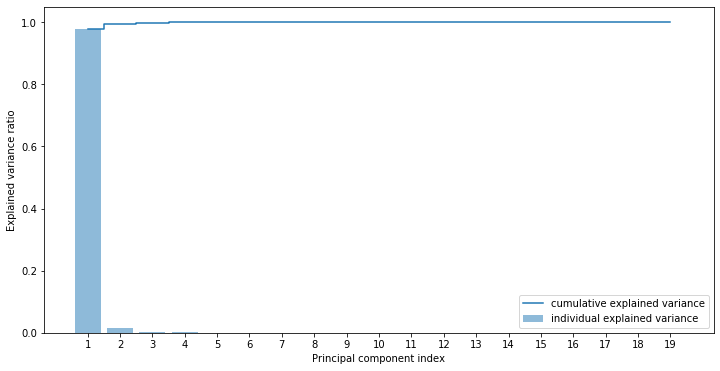

In [171]:
plot_pca_index(len(var_exp_byd),var_exp_byd,cum_exp_byd)

In [172]:
cum_exp_byd

array([0.97816028, 0.99494582, 0.99771358, 0.99957918, 0.9998247 ,
       0.99995251, 0.99998109, 0.99999702, 0.99999915, 0.99999965,
       0.99999992, 0.99999997, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        ])